In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("datas/HeightWeight.csv")

display(data.head())
display(len(data))

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


25000

데이터 분포 확인

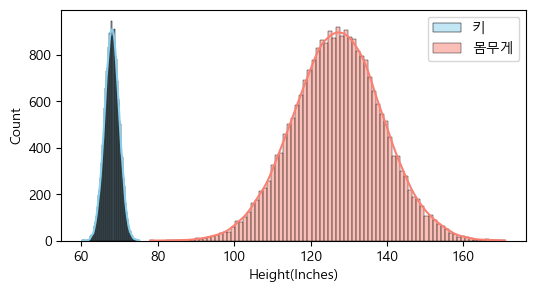

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False  # minus 부호 출력 설정

plt.figure(figsize=(6, 3))
# kde=True: 곡선 추가
sns.histplot(data['Height(Inches)'], kde=True, label='키', color="Skyblue")
sns.histplot(data['Weight(Pounds)'], kde=True, label='몸무게', color="Salmon")

plt.legend()
plt.show()

StandardScaler 객체 생성

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [6]:
data = data.drop(['Index'], axis=1)

scaler.fit(data) # 데이터의 평균과 표준편차 계산
scaler_data = scaler.transform(data) # 평균을 빼고 표준편차로 나눠 표준화
scaler_data = pd.DataFrame(scaler_data, columns=[['키', '몸무게']])
scaler_data.head()

,키,몸무게
0,-1.162051,-1.208072
1,1.852136,0.806805
2,0.739165,2.225214
3,0.117523,1.308328
4,-0.107961,1.476561


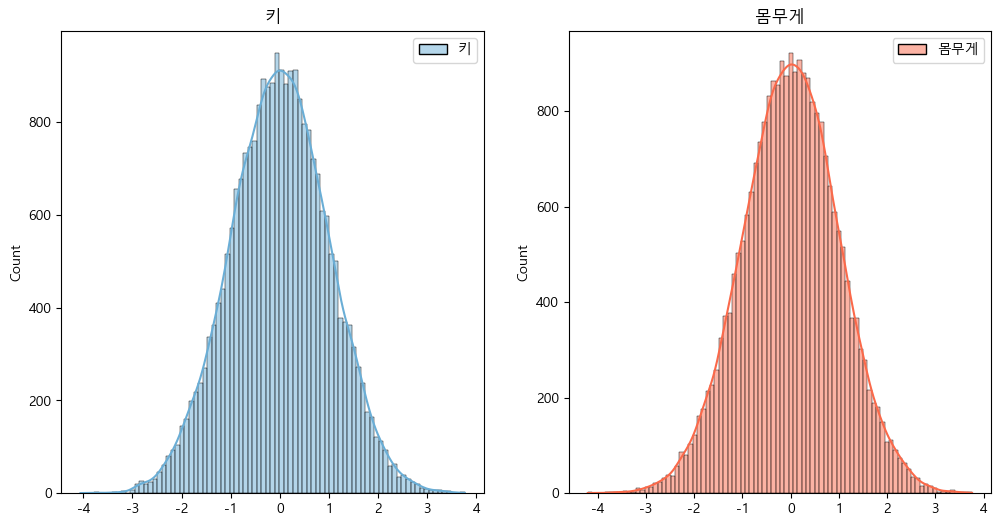

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Figure 객체 생성
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# 첫 번째 서브플롯에 키에 대한 히스토그램 그리기
sns.histplot(scaler_data['키'], kde=True, palette="Blues", ax=ax1)
ax1.set_title('키')

# 두 번째 서브플롯에 몸무게에 대한 히스토그램 그리기
sns.histplot(scaler_data['몸무게'], kde=True, palette="Reds", ax=ax2)
ax2.set_title('몸무게')

plt.show()
